In [ ]:
#Caso você já tenha as bibliotecas instaladas na sua maquina não é necessário execultar esta linha.

!pip install numpy pandas scipy matplotlib statsmodels seaborn sympy nose kneed

# Clustering com o método K-Means

In [6]:
#Importação dos pacotes e utilitários

import numpy as np
import pandas as pd
import seaborn as sns
sns.regplot
import requests
import io
import matplotlib.pyplot as plt
import os
import seaborn as seabornInstance
from kneed import KneeLocator

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

np.random.seed(42)


%matplotlib inline

# Importando Dados

In [9]:
from sklearn.datasets import load_iris
ds1 = load_iris()

ds1.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
ds1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# MÉTODO DO COTOVELO

In [11]:
#Método de cotovelo para minimizar WSS (soma do quadrado dentro do cluster)
Sum_of_squared_distances =[]  #criar uma lista vazia, para armazenar os valores calculados
R=range(1,15)              #criar um loop para criar diferentes quantidades de clusters atribuindo os valores a variável k
for k in R:
    km = KMeans(n_clusters=k) # Aplico a função K-means e entre parênteses indica que o número de clusters mudará conforme o 
                              # valor de k muda.
        
    km = km.fit(ds1.data) #Aplico K-Means a base de dados
    Sum_of_squared_distances.append(km.inertia_) # agrego as distâncias wcss a lista vazia criada acima na Sum_of_squared_distances

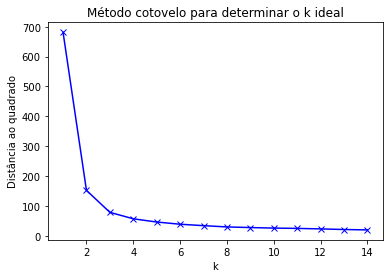

In [12]:
#Plotando a curva cotovelo por k (numero de clusters)
plt.plot(R,Sum_of_squared_distances, 'bx-') #colocando as variáveis que serão independente e dependente 
plt.xlabel('k') # label da variável de x
plt.ylabel('Distância ao quadrado')# label da variável y
plt.title('Método cotovelo para determinar o k ideal') # título do gráfico
plt.show()

In [13]:
kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")

In [14]:
kl.elbow

3

K ótimo é  3.

# coeficiente da silhueta

In [15]:
silhouette_coefficients = []
x= range(2, 15)
for k in x:
    kmeans = KMeans(n_clusters=k)#, **kmeans_kwargs)
    kmeans.fit(ds1.data)
    score = silhouette_score(ds1.data, kmeans.labels_)
    silhouette_coefficients.append(score)

Médias da silhueta para cada k mostra que a melhor escolha para k é 3, uma vez que tem a pontuação máxima:

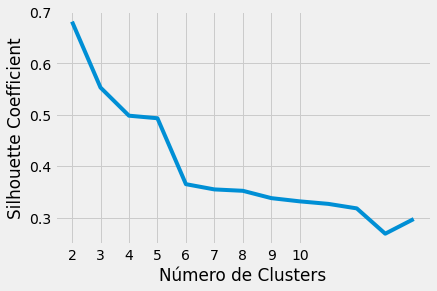

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(x, silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Método do K-Means a base de dados

In [26]:
kmeans = KMeans(n_clusters = 3)
kmeans

KMeans(n_clusters=3)

In [27]:
KMmodel = kmeans.fit(ds1.data)
KMmodel


KMeans(n_clusters=3)

In [28]:
y_pred = KMmodel.labels_

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
kmeans_centers = KMmodel.cluster_centers_
kmeans_centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#Traçando a Curva ROC para o dataset

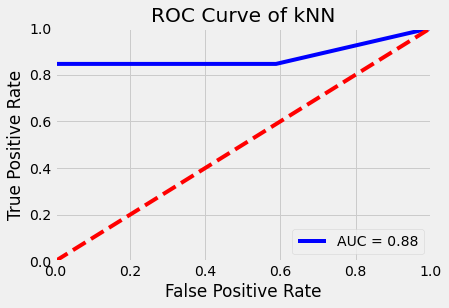

In [31]:
#divisão do datasete em treino e teste, tamanho do "array" de teste escolhido foi 20% do dataset
X, y = ds1.data, ds1.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit
KMmodel.fit(X_train,y_train)

#Predict
y_scores = KMmodel.predict(X_test)
#print(y_scores)

#Avaliação com a metrica ROC

fpr, tpr, threshold = roc_curve(y_test, y_scores, pos_label=2)
roc_auc = auc(fpr, tpr)

#Plot
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Matriz de confusão

In [32]:
from sklearn.metrics import confusion_matrix

y_true = ds1.target
matriz = confusion_matrix(y_true, y_pred)

print(matriz)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
